In [1]:
# import packages
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import numpy as np
# other installed packages: scipy, scikit-learn, statsmodels

In [2]:
# read dataset
df = pd.read_csv('../datasets/1-ibm-hr.csv')

In [3]:
# split categorical and numerical columns (except Attrition)

# categorical columns: Attrition, BusinessTravel, Department, EducationField, Gender, MaritalStatus, Over18, OverTime
categorical_columns = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']
categorical= df.select_dtypes(include= "object") 

# integer values with categorical meanings:
int_categorical_columns = ['Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction', 'PerformanceRating', 'RelationshipSatisfaction', 'WorkLifeBalance', 'JobLevel', 'StockOptionLevel']
int_categorical = df[int_categorical_columns]

# numerical columns
numerical_columns = ['Age', 'DailyRate', 'DistanceFromHome', 'EmployeeCount', 'EmployeeNumber', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'StandardHours', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
numerical = df[numerical_columns]

target_column = 'Attrition'

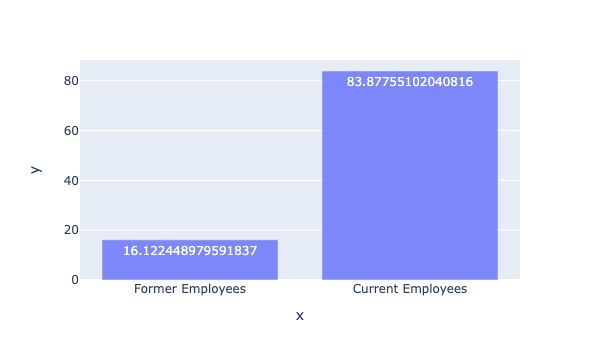

In [10]:
# start your analysis here
plot_df=categorical['Attrition'].value_counts(normalize=True)
plot_df=plot_df.mul(100).rename('Percent').reset_index().sort_values('Percent')
plot_df.rename(columns={'index':'Attrition'}, inplace=True)
plot_df['Attrition']=['Former Employees' if i == 'Yes' else 'Current Employees' for i in plot_df['Attrition']]
x=plot_df['Attrition']
y=plot_df['Percent']

px.bar(x=x, y=y, text=y,opacity=.8)

<Axes: xlabel='MonthlyIncome', ylabel='Density'>

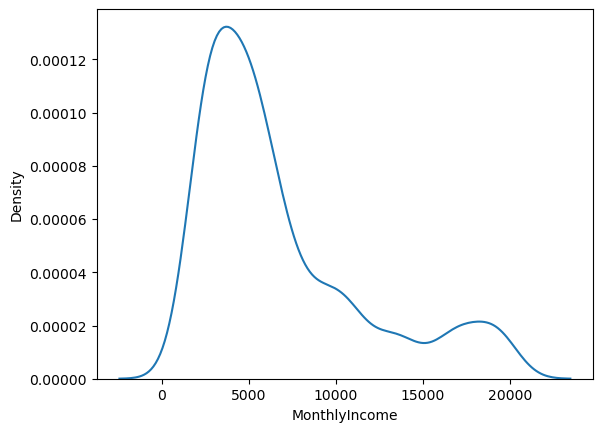

In [12]:
pd.options.display.max_columns = None
df_HR = df.copy()
sns.kdeplot(df_HR.loc[df_HR['Attrition'] == 'No', 'MonthlyIncome'], label = 'Active Employee')

<Axes: xlabel='Gender', ylabel='MonthlyIncome'>

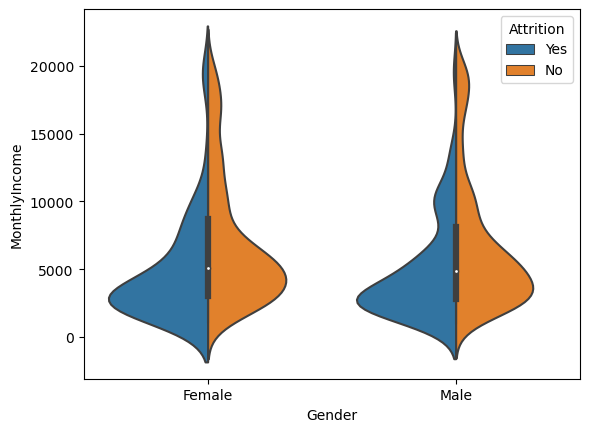

In [13]:
sns.violinplot(x='Gender', y='MonthlyIncome',hue='Attrition',split=True,data=df)

<Axes: xlabel='Age', ylabel='Density'>

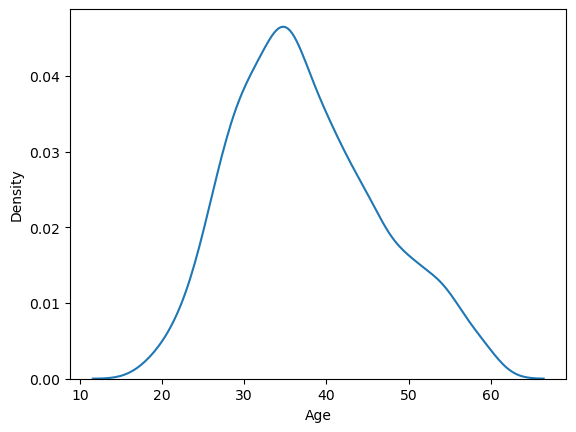

In [14]:
sns.kdeplot(df_HR.loc[df_HR['Attrition'] == 'No', 'Age'], label = 'Active Employee')

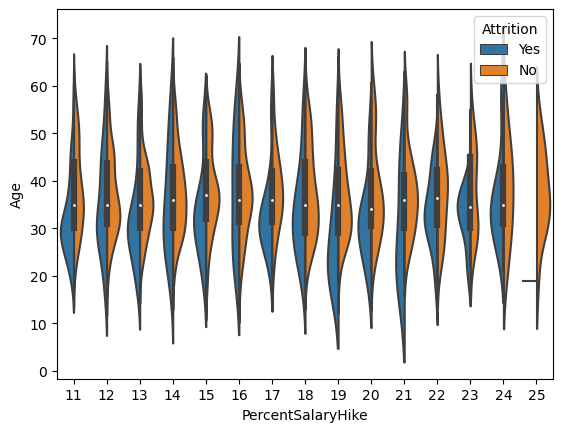

In [22]:
from sklearn.model_selection import train_test_split, KFold, cross_validate
summary = resumetable(df_HR)
const_list = ['EmployeeCount',  'Over18',  'StandardHours']
df_HR.drop(const_list,axis=1, inplace=True)
g2 = sns.violinplot(x='PercentSalaryHike', y='Age',split=True, hue='Attrition',data=df_HR)